In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import  metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

# Wczytywanie danych

In [2]:
test = pd.read_csv('airline_test.csv', sep =',')
train = pd.read_csv('airline_train.csv', sep =',')

In [3]:
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


# Przetwarzanie danych

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

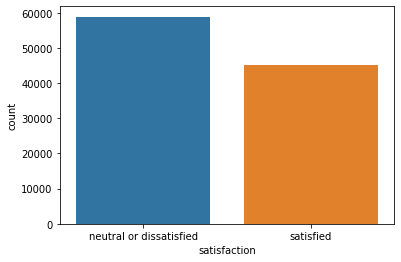

In [5]:
sns.countplot(data=train, x='satisfaction')

In [6]:
print(train.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
print(test.isnull().sum())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [8]:
data = pd.concat([train, test], axis=0, sort=False)

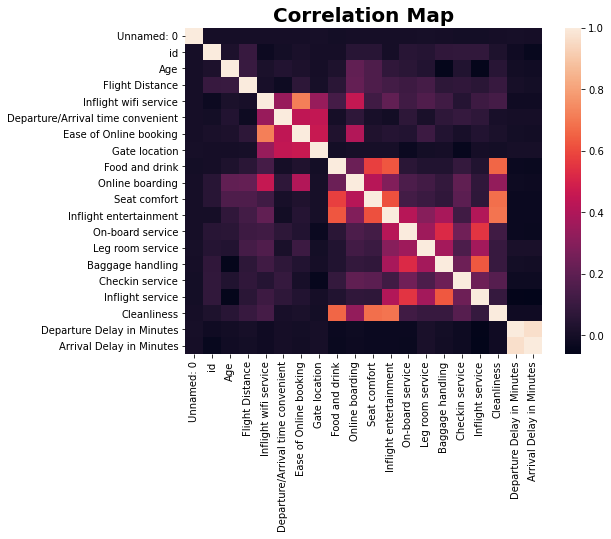

In [9]:
corr_df = data.corr()
fig, axs = plt.subplots(figsize=(8, 6))
ax=sns.heatmap(corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

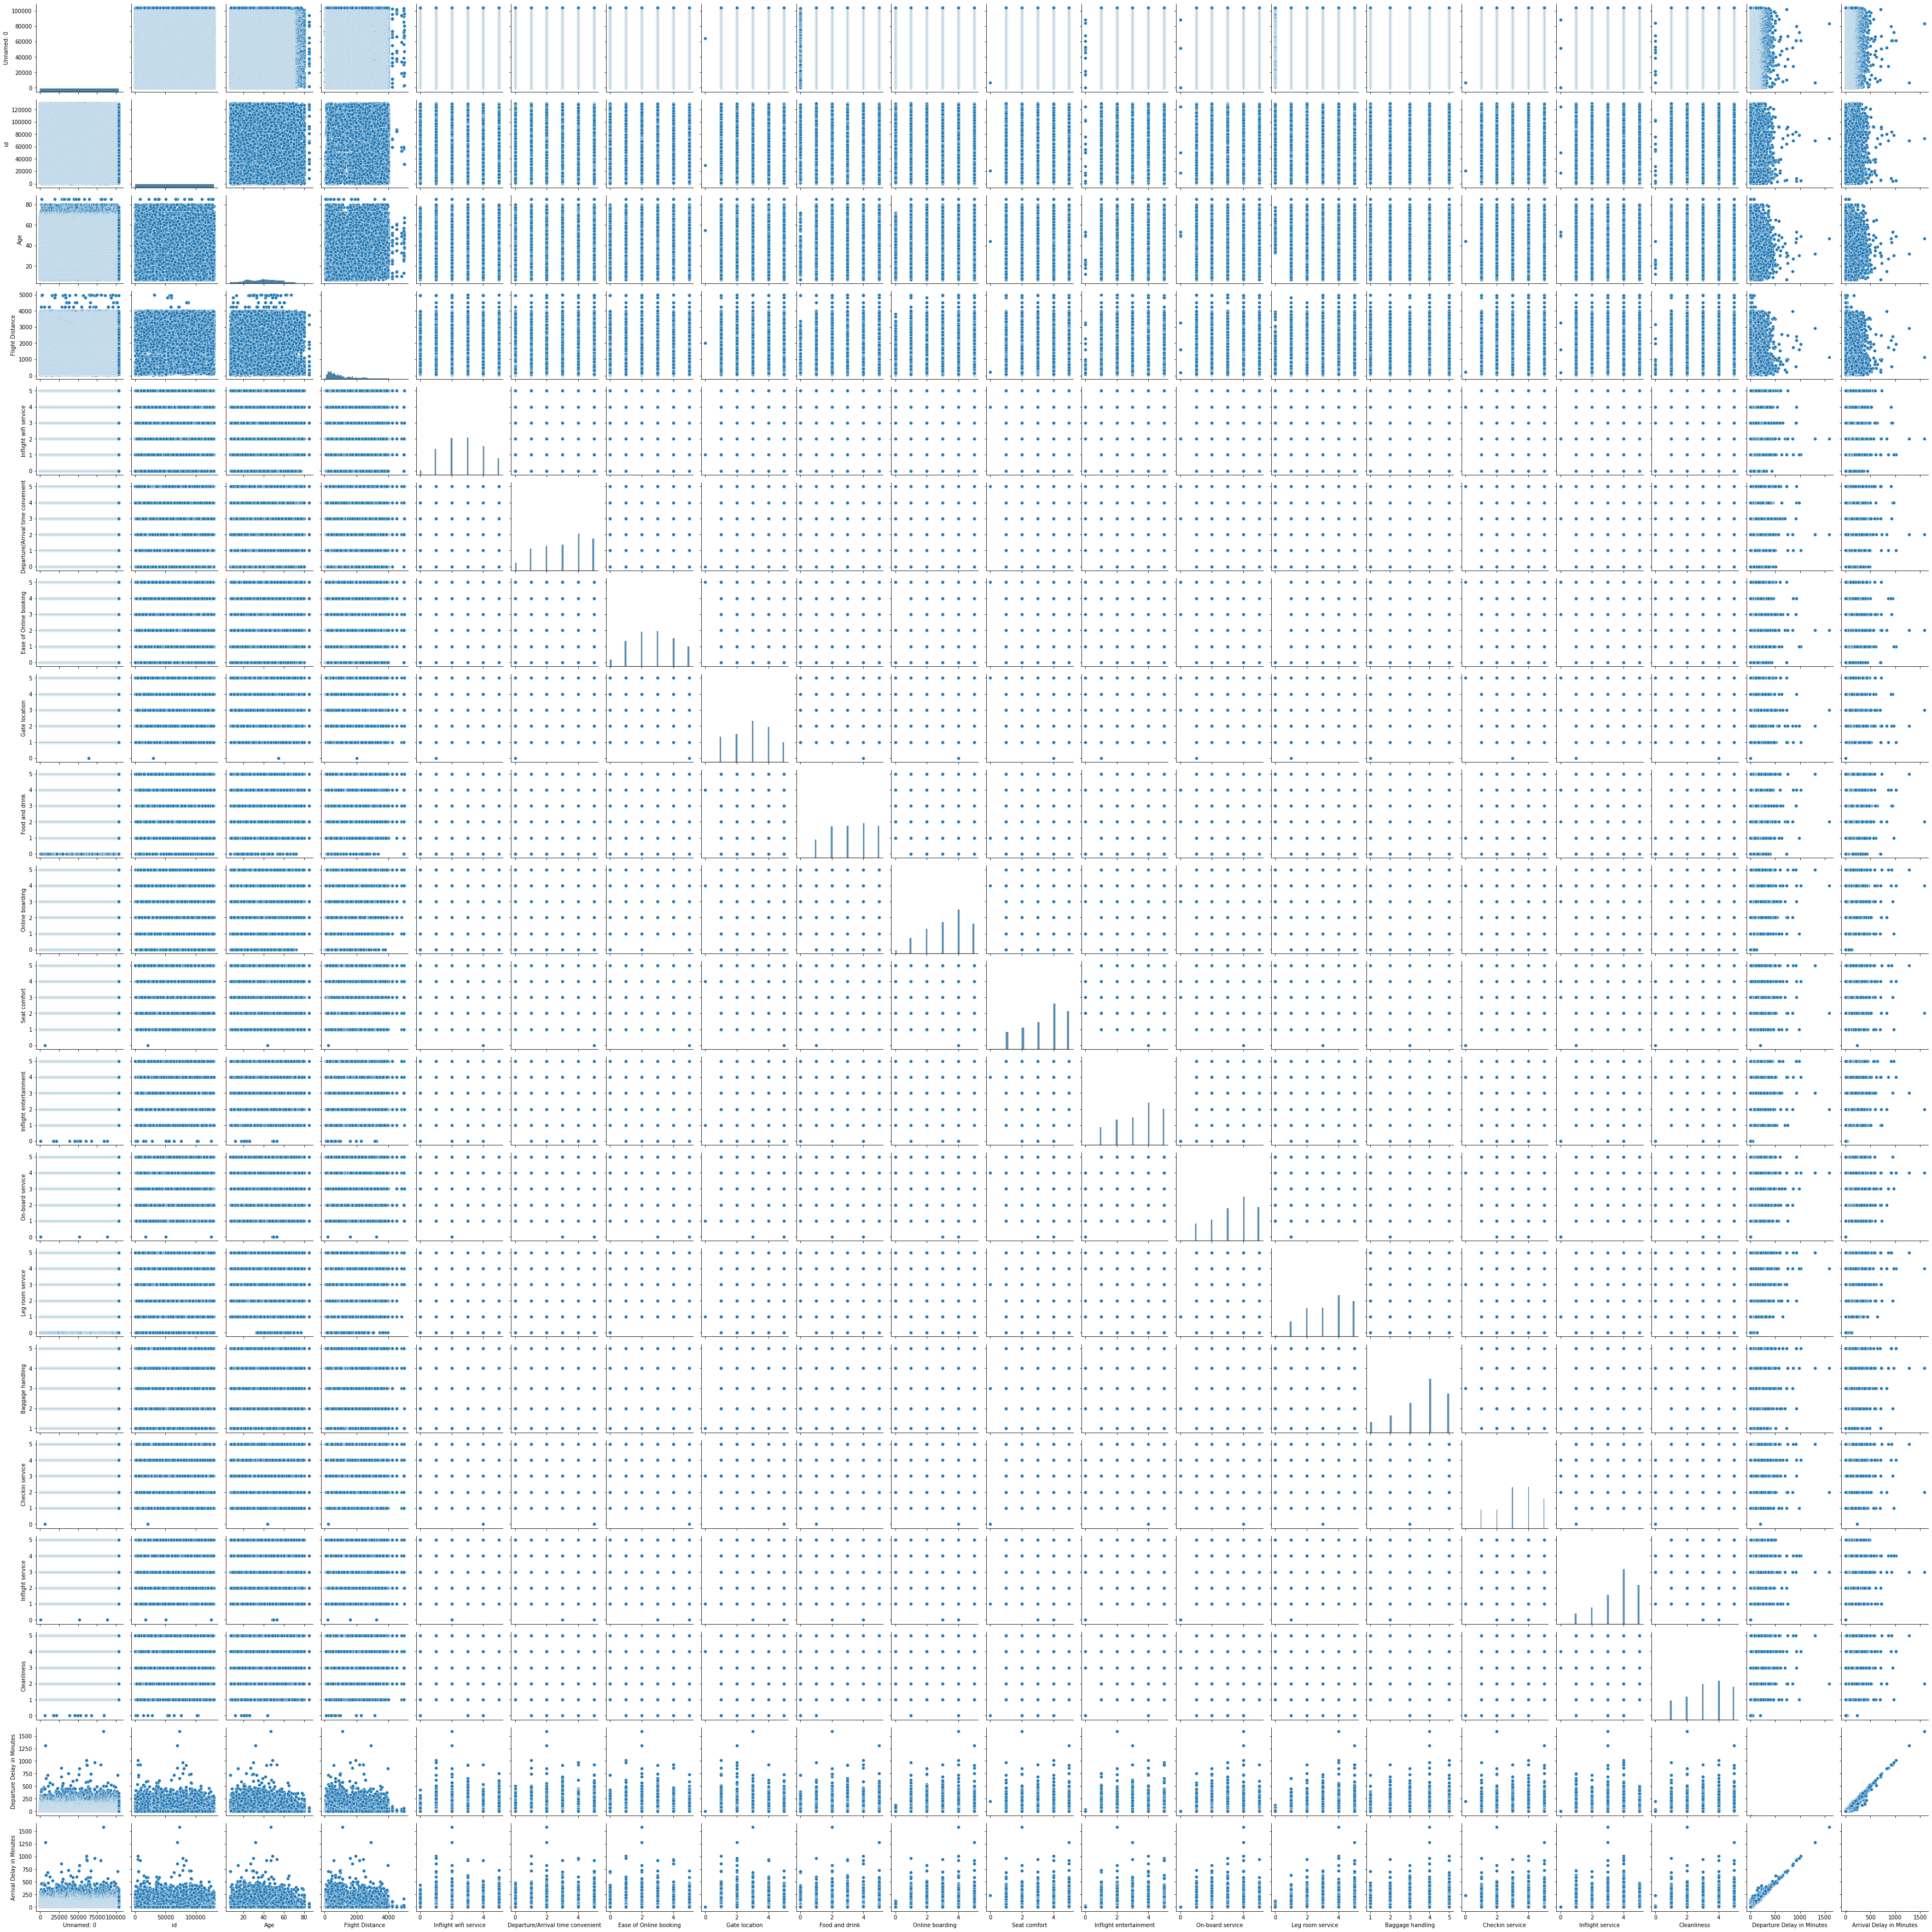

In [10]:
sns.pairplot(train)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

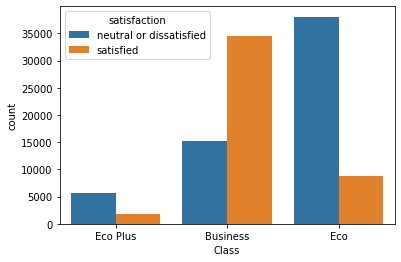

In [11]:
sns.countplot(data=train, x='Class', hue='satisfaction')

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

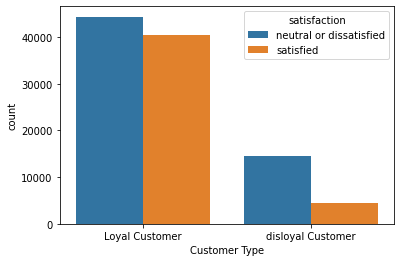

In [12]:
sns.countplot(data=train, x='Customer Type', hue='satisfaction')

<AxesSubplot:xlabel='Gender', ylabel='count'>

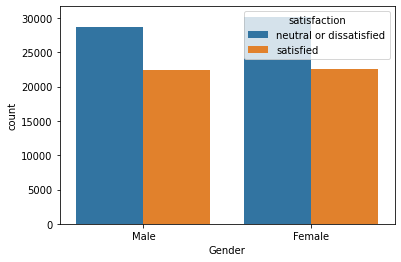

In [13]:
sns.countplot(data=train, x='Gender', hue='satisfaction')

In [14]:
train["Arrival Delay in Minutes"].fillna(train.groupby(["Departure Delay in Minutes"])["Arrival Delay in Minutes"].transform("mean"), inplace=True)

In [15]:
train = train.dropna()

In [16]:
print(train.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [17]:
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [18]:
test["Arrival Delay in Minutes"].fillna(test.groupby(["Departure Delay in Minutes"])["Arrival Delay in Minutes"].transform("mean"), inplace=True)

In [19]:
test = test.dropna()

In [20]:
print(test.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [21]:
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103903 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103903 non-null  int64  
 1   id                                 103903 non-null  int64  
 2   Gender                             103903 non-null  object 
 3   Customer Type                      103903 non-null  object 
 4   Age                                103903 non-null  int64  
 5   Type of Travel                     103903 non-null  object 
 6   Class                              103903 non-null  object 
 7   Flight Distance                    103903 non-null  int64  
 8   Inflight wifi service              103903 non-null  int64  
 9   Departure/Arrival time convenient  103903 non-null  int64  
 10  Ease of Online booking             103903 non-null  int64  
 11  Gate location                      1039

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25974 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25974 non-null  int64  
 1   id                                 25974 non-null  int64  
 2   Gender                             25974 non-null  object 
 3   Customer Type                      25974 non-null  object 
 4   Age                                25974 non-null  int64  
 5   Type of Travel                     25974 non-null  object 
 6   Class                              25974 non-null  object 
 7   Flight Distance                    25974 non-null  int64  
 8   Inflight wifi service              25974 non-null  int64  
 9   Departure/Arrival time convenient  25974 non-null  int64  
 10  Ease of Online booking             25974 non-null  int64  
 11  Gate location                      25974 non-null  int

In [24]:
train['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [25]:
test['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [26]:
 def fill_class(pclass):
        if pclass == "Business":
            return 2
        elif pclass == "Eco Plus":
            return 1
        else:
            return 0
    

In [27]:
train['Class'] = train.apply(lambda x: fill_class(x['Class']), axis=1)
test['Class'] = test.apply(lambda x: fill_class(x['Class']), axis=1)

In [28]:
train['Class']

0         1
1         2
2         2
3         2
4         2
         ..
103899    0
103900    2
103901    2
103902    0
103903    2
Name: Class, Length: 103903, dtype: int64

In [29]:
test['Class']

0        0
1        2
2        0
3        2
4        0
        ..
25971    2
25972    2
25973    0
25974    2
25975    0
Name: Class, Length: 25974, dtype: int64

In [30]:
train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [31]:
test['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [32]:
 def fill_satisfied(pclass):
        if pclass == "neutral or dissatisfied":
            return 0
        else:
            return 1

In [33]:
train['satisfaction'] = train.apply(lambda x: fill_satisfied(x['satisfaction']), axis=1)
test['satisfaction'] = test.apply(lambda x: fill_satisfied(x['satisfaction']), axis=1)

In [34]:
train['satisfaction']

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103903, dtype: int64

In [35]:
test['satisfaction']

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25974, dtype: int64

In [36]:
train["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [37]:
test["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [38]:
 def fill_customer_type(ctype):
        if ctype == "disloyal Customer":
            return 0
        else:
            return 1

In [39]:
train['Customer Type'] = train.apply(lambda x: fill_customer_type(x['Customer Type']), axis=1)
test['Customer Type'] = test.apply(lambda x: fill_customer_type(x['Customer Type']), axis=1)

In [40]:
train['Customer Type']

0         1
1         0
2         1
3         1
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    1
Name: Customer Type, Length: 103903, dtype: int64

In [41]:
test['Customer Type']

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    1
25974    1
25975    1
Name: Customer Type, Length: 25974, dtype: int64

In [42]:
train["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [43]:
test["Type of Travel"].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [44]:
train = pd.get_dummies(train, columns=["Type of Travel"])

In [45]:
test = pd.get_dummies(test, columns=["Type of Travel"])

In [46]:
train.rename({"Type of Travel_Business travel": 'Business travel', 'Type of Travel_Personal Travel': 'Personal travel'}, axis=1, inplace=True)

In [47]:
test.rename({"Type of Travel_Business travel": 'Business travel', 'Type of Travel_Personal Travel': 'Personal travel'}, axis=1, inplace=True)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103903 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103903 non-null  int64  
 1   id                                 103903 non-null  int64  
 2   Gender                             103903 non-null  object 
 3   Customer Type                      103903 non-null  int64  
 4   Age                                103903 non-null  int64  
 5   Class                              103903 non-null  int64  
 6   Flight Distance                    103903 non-null  int64  
 7   Inflight wifi service              103903 non-null  int64  
 8   Departure/Arrival time convenient  103903 non-null  int64  
 9   Ease of Online booking             103903 non-null  int64  
 10  Gate location                      103903 non-null  int64  
 11  Food and drink                     1039

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103903 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103903 non-null  int64  
 1   id                                 103903 non-null  int64  
 2   Gender                             103903 non-null  object 
 3   Customer Type                      103903 non-null  int64  
 4   Age                                103903 non-null  int64  
 5   Class                              103903 non-null  int64  
 6   Flight Distance                    103903 non-null  int64  
 7   Inflight wifi service              103903 non-null  int64  
 8   Departure/Arrival time convenient  103903 non-null  int64  
 9   Ease of Online booking             103903 non-null  int64  
 10  Gate location                      103903 non-null  int64  
 11  Food and drink                     1039

In [50]:
train = pd.get_dummies(train, columns=["Gender"])
test = pd.get_dummies(test, columns=["Gender"])

In [51]:
train.rename({"Gender_Female": 'Female', 'Gender_Male': 'Male'}, axis=1, inplace=True)
test.rename({"Gender_Female": 'Female', 'Gender_Male': 'Male'}, axis=1, inplace=True)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103903 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103903 non-null  int64  
 1   id                                 103903 non-null  int64  
 2   Customer Type                      103903 non-null  int64  
 3   Age                                103903 non-null  int64  
 4   Class                              103903 non-null  int64  
 5   Flight Distance                    103903 non-null  int64  
 6   Inflight wifi service              103903 non-null  int64  
 7   Departure/Arrival time convenient  103903 non-null  int64  
 8   Ease of Online booking             103903 non-null  int64  
 9   Gate location                      103903 non-null  int64  
 10  Food and drink                     103903 non-null  int64  
 11  Online boarding                    1039

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25974 entries, 0 to 25975
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25974 non-null  int64  
 1   id                                 25974 non-null  int64  
 2   Customer Type                      25974 non-null  int64  
 3   Age                                25974 non-null  int64  
 4   Class                              25974 non-null  int64  
 5   Flight Distance                    25974 non-null  int64  
 6   Inflight wifi service              25974 non-null  int64  
 7   Departure/Arrival time convenient  25974 non-null  int64  
 8   Ease of Online booking             25974 non-null  int64  
 9   Gate location                      25974 non-null  int64  
 10  Food and drink                     25974 non-null  int64  
 11  Online boarding                    25974 non-null  int

In [54]:
train.head()

,Unnamed: 0,id,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business travel,Personal travel,Female,Male
0,0,70172,1,13,1,460,3,4,3,1,...,4,5,5,25,18.0,0,0,1,0,1
1,1,5047,0,25,2,235,3,2,3,3,...,1,4,1,1,6.0,0,1,0,0,1
2,2,110028,1,26,2,1142,2,2,2,2,...,4,4,5,0,0.0,1,1,0,1,0
3,3,24026,1,25,2,562,2,5,5,5,...,1,4,2,11,9.0,0,1,0,1,0
4,4,119299,1,61,2,214,3,3,3,3,...,3,3,3,0,0.0,1,1,0,0,1


In [55]:
X_train_validation = train.sample(10000, random_state=1)
y_train_validation = X_train_validation['satisfaction']
del X_train_validation['satisfaction']

In [56]:
train = train.sample(10000, random_state=1)
y_train = train['satisfaction']
del train['satisfaction']

In [57]:
train.head()

,Unnamed: 0,id,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business travel,Personal travel,Female,Male
65829,65829,81488,0,25,0,528,4,4,3,4,...,3,4,3,4,0,0.0,0,1,1,0
41025,41025,782,0,39,2,89,5,0,0,3,...,4,4,5,1,23,38.0,1,0,0,1
51870,51870,77993,0,24,0,227,1,4,1,2,...,4,5,5,3,4,1.0,1,0,1,0
92541,92541,29162,1,17,1,605,5,4,4,4,...,5,2,3,5,0,2.0,1,0,1,0
99866,99866,22658,1,25,1,250,3,5,0,1,...,5,4,5,1,0,0.0,0,1,0,1


In [58]:
X_train = train

In [59]:
y_test = test['satisfaction']

In [60]:
del test['satisfaction']

In [61]:
test.head()

,Unnamed: 0,id,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business travel,Personal travel,Female,Male
0,0,19556,1,52,0,160,5,4,3,4,...,5,2,5,5,50,44.0,1,0,1,0
1,1,90035,1,36,2,2863,1,1,3,1,...,4,3,4,5,0,0.0,1,0,1,0
2,2,12360,0,20,0,192,2,0,2,4,...,3,2,2,2,0,0.0,1,0,0,1
3,3,77959,1,44,2,3377,0,0,0,2,...,1,3,1,4,0,6.0,1,0,0,1
4,4,36875,1,49,0,1182,2,3,4,3,...,2,4,2,4,0,20.0,1,0,1,0


In [62]:
X_test = test

# Modelowanie

In [63]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
models = {}

In [64]:
pipe1 = Pipeline([
    ('preprocessing', StandardScaler()), 
    ('classifier', LogisticRegression(C=1, solver='newton-cg'))])

param_grid_1 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(pipe1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.01}

In [65]:
pipe_2 = Pipeline([('preprocessing', StandardScaler()),
                   ('classifier', SVC(kernel='linear'))])

param_grid_2 = {'classifier__C': [0.001, 0.01, 0.1, 1],
              'classifier__gamma': [0.001, 0.01, 0.1, 1]}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.01, 'classifier__gamma': 0.001}

In [66]:
pipe_3 = Pipeline([('preprocessing', StandardScaler()),
                   ('classifier', SVC(kernel='poly'))])

param_grid_3 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 0.1, 'classifier__gamma': 0.1}

In [67]:
pipe_4 = Pipeline([('preprocessing', StandardScaler()),
                   ('classifier', SVC(kernel='rbf'))])

param_grid_4 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__C': 100, 'classifier__gamma': 0.01}

In [68]:
from sklearn.ensemble import RandomForestClassifier

pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))])

param_grid_5 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]}

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 100}

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
pipe_6 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(
                       DecisionTreeClassifier(random_state=42),
                       n_estimators=500,
                       learning_rate=0.5))])

param_grid_6 = {'classifier__n_estimators': [10,50,100],
              'classifier__learning_rate': [0.1, 0.2, 0.3,0.5,0.6,0.7,0.8,0.9]}

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__learning_rate': 0.3, 'classifier__n_estimators': 50}

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                      n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))])

param_grid_7 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]}

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__learning_rate': 0.2, 'classifier__n_estimators': 200}

In [71]:
from sklearn.neighbors import KNeighborsClassifier
pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', KNeighborsClassifier())])

param_grid_8 = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_neighbors': [1, 2, 3, 5, 10, 100]}

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)
grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__n_neighbors': 10, 'preprocessing': StandardScaler()}

In [72]:
pipe_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', 
                                                         DecisionTreeClassifier(random_state=0))])
param_grid_9 = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__max_depth': [1, 2, 5, 10, 100],
    'classifier__min_samples_leaf': [1, 2, 4, 10]}

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 2,
 'preprocessing': StandardScaler()}

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
pipe_10 = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42))])
param_grid_10 = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__max_leaf_nodes': [4, 8, 16, 64]}

grid_10 = GridSearchCV(pipe_10, param_grid_10, cv=kfold, return_train_score=True)
grid_10.fit(X_train, y_train)
grid_10.best_params_

{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 500,
 'preprocessing': MinMaxScaler()}

In [74]:
from sklearn import  metrics


models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('SVC linear', grid_2.best_estimator_))
models.append(('SVC poly', grid_3.best_estimator_))
models.append(('SVC rbf', grid_4.best_estimator_))
models.append(('RandomForest', grid_5.best_estimator_))
models.append(('AdaBoost', grid_6.best_estimator_))
models.append(('GradientBoosting', grid_7.best_estimator_))
models.append(('KNeighbours', grid_8.best_estimator_))
models.append(('DecisionTree', grid_9.best_estimator_))
models.append(('ExtraTrees', grid_10.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
  print(name)
  print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro')))
  print("recall_score: {}".format(metrics.recall_score(y_test, model.predict(X_test), average='micro')))
  print("f1_score: {}".format(metrics.f1_score(y_test, model.predict(X_test), average='micro')))
  print("accuracy_score: {}".format(metrics.accuracy_score(y_test, model.predict(X_test))))
  precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='micro'))
  recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='micro'))
  f1_score.append(metrics.f1_score(y_test, model.predict(X_test), average='micro'))
  accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

LR
precision_score: 0.8702163702163702
recall_score: 0.8702163702163702
f1_score: 0.8702163702163703
accuracy_score: 0.8702163702163702
SVC linear
precision_score: 0.8736043736043736
recall_score: 0.8736043736043736
f1_score: 0.8736043736043737
accuracy_score: 0.8736043736043736
SVC poly
precision_score: 0.9196119196119196
recall_score: 0.9196119196119196
f1_score: 0.9196119196119196
accuracy_score: 0.9196119196119196
SVC rbf
precision_score: 0.942057442057442
recall_score: 0.942057442057442
f1_score: 0.942057442057442
accuracy_score: 0.942057442057442
RandomForest
precision_score: 0.9173404173404174
recall_score: 0.9173404173404174
f1_score: 0.9173404173404174
accuracy_score: 0.9173404173404174
AdaBoost
precision_score: 0.9263109263109263
recall_score: 0.9263109263109263
f1_score: 0.9263109263109263
accuracy_score: 0.9263109263109263
GradientBoosting
precision_score: 0.9491029491029491
recall_score: 0.9491029491029491
f1_score: 0.9491029491029491
accuracy_score: 0.9491029491029491
KNe

In [75]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LR', 'SVC linear', 'SVC poly','SVC rbf',"RandomForest" ,"AdaBoost", "GradientBoosting", "KNeighbours", "DecisionTree", "ExtraTrees"])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,LR,0.870216,0.870216,0.870216,0.870216
1,SVC linear,0.873604,0.873604,0.873604,0.873604
2,SVC poly,0.919612,0.919612,0.919612,0.919612
3,SVC rbf,0.942057,0.942057,0.942057,0.942057
4,RandomForest,0.917340,0.917340,0.917340,0.917340
5,AdaBoost,0.926311,0.926311,0.926311,0.926311
6,GradientBoosting,0.949103,0.949103,0.949103,0.949103
7,KNeighbours,0.899861,0.899861,0.899861,0.899861
8,DecisionTree,0.932933,0.932933,0.932933,0.932933
9,ExtraTrees,0.913182,0.913182,0.913182,0.913182


LR
SVC linear
SVC poly
SVC rbf
RandomForest
AdaBoost
GradientBoosting
KNeighbours
DecisionTree
ExtraTrees


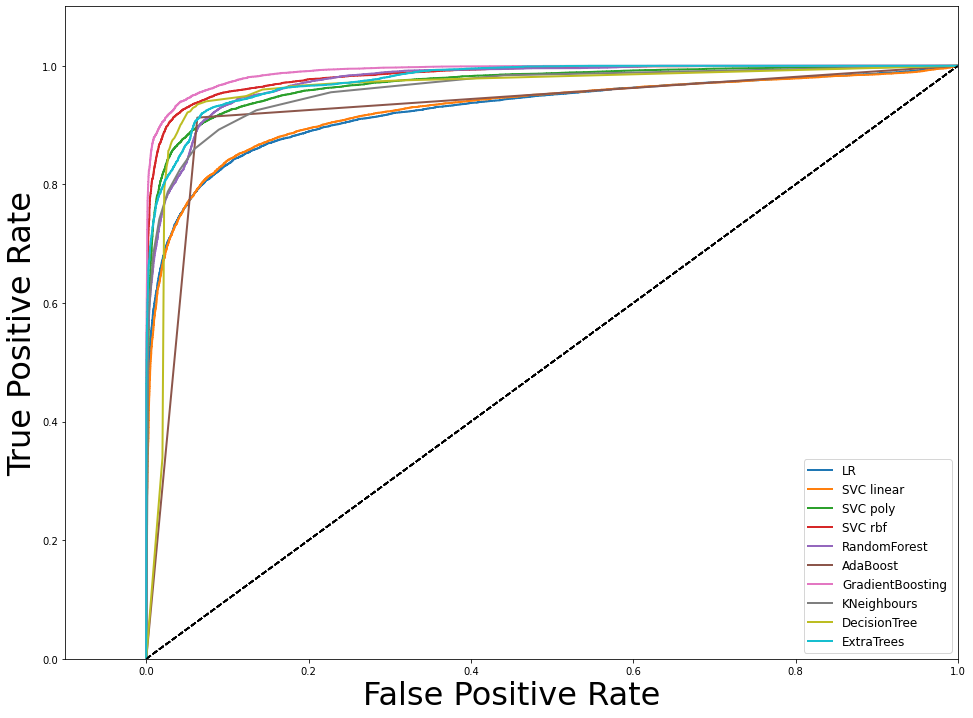

In [76]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.1, 1, 0, 1.1])
    plt.xlabel('False Positive Rate', fontsize=32)
    plt.ylabel('True Positive Rate', fontsize=32)

plt.figure(figsize=(16, 12))
for name, model in models:
    print(name)
    if (name == 'SVC linear' or name == 'SVC poly' or name == 'SVC rbf'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=12)
plt.show()

# Sieci Neuronowe

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.callbacks import EarlyStopping
from keras.callbacks import History

clear_session()
earlyStopping = EarlyStopping(monitor='loss', patience=20)
deep_model_1 = Sequential()
deep_model_1.add(Dense(25,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_1.add(Dense(1,activation="sigmoid"))
deep_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                675       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 23s 4ms/step - loss: 2320.6859 - accuracy: 0.5519 - val_loss: 69.0209 - val_accuracy: 0.4932
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 43.8276 - accuracy: 0.5525 - val_loss: 29.2166 - val_accuracy: 0.5353
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 27.9598 - accuracy: 0.5479 - val_loss: 41.1207 - val_accuracy: 0.5608
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 23.9157 - accuracy: 0.5564 - val_loss: 15.2360 - val_accuracy: 0.5630
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 18.9891 - accuracy: 0.5494 - val_loss: 28.5281 - val_accuracy: 0.4905
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 18.2285 - accuracy: 0.5594 - val_loss: 34.2760 - val_accuracy: 0.4350
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 22.4263 - accuracy: 0.5509 - val_loss: 7.1290 - val_

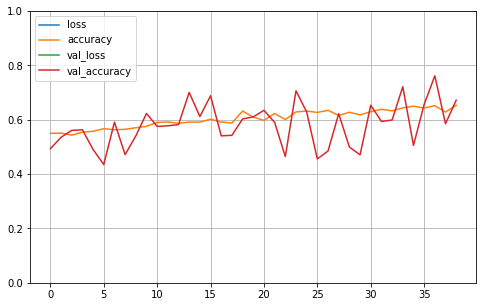

313/313 [==============================] - 0s 1000us/step - loss: 6.7344 - accuracy: 0.6718


[6.734424114227295, 0.6718000173568726]

In [78]:
deep_model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_1 = deep_model_1.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_1.evaluate(X_train_validation, y_train_validation)

In [79]:
clear_session()
deep_model_2 = Sequential()
deep_model_2.add(Dense(25,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_2.add(Dense(10,activation="relu"))
deep_model_2.add(Dense(1,activation="sigmoid"))
deep_model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                675       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 946
Trainable params: 946
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 2s 3ms/step - loss: 1372.8920 - accuracy: 0.5177 - val_loss: 24.2303 - val_accuracy: 0.5382
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 34.8707 - accuracy: 0.5481 - val_loss: 20.3822 - val_accuracy: 0.5927
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 26.8221 - accuracy: 0.5419 - val_loss: 52.7227 - val_accuracy: 0.5849
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 24.6181 - accuracy: 0.5474 - val_loss: 22.8950 - val_accuracy: 0.5159
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 32.8552 - accuracy: 0.5391 - val_loss: 28.3870 - val_accuracy: 0.5328
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 30.0836 - accuracy: 0.5537 - val_loss: 10.9207 - val_accuracy: 0.5604
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 25.3128 - accuracy: 0.5463 - val_loss: 58.9474 - val_

313/313 [==============================] - 1s 2ms/step - loss: 10.9558 - accuracy: 0.6313 - val_loss: 3.5045 - val_accuracy: 0.7394
Epoch 58/100
313/313 [==============================] - 1s 2ms/step - loss: 10.5782 - accuracy: 0.6382 - val_loss: 6.0753 - val_accuracy: 0.6033
Epoch 59/100
313/313 [==============================] - 1s 2ms/step - loss: 9.1059 - accuracy: 0.6535 - val_loss: 4.4027 - val_accuracy: 0.7328
Epoch 60/100
313/313 [==============================] - 1s 2ms/step - loss: 12.3040 - accuracy: 0.6391 - val_loss: 3.8396 - val_accuracy: 0.7265
Epoch 61/100
313/313 [==============================] - 1s 2ms/step - loss: 10.4846 - accuracy: 0.6384 - val_loss: 9.3291 - val_accuracy: 0.5923
Epoch 62/100
313/313 [==============================] - 1s 2ms/step - loss: 11.0224 - accuracy: 0.6419 - val_loss: 17.0328 - val_accuracy: 0.4657
Epoch 63/100
313/313 [==============================] - 1s 2ms/step - loss: 14.1441 - accuracy: 0.6029 - val_loss: 24.5030 - val_accuracy: 0.54

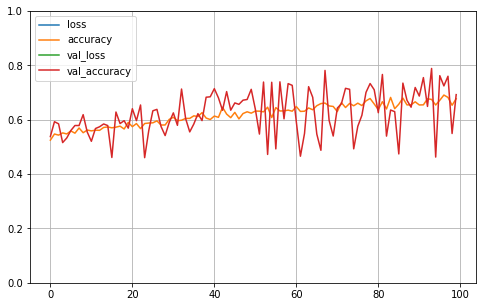

313/313 [==============================] - 0s 968us/step - loss: 6.3042 - accuracy: 0.6923


[6.304187297821045, 0.692300021648407]

In [80]:
deep_model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_2 = deep_model_2.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_2.evaluate(X_train_validation, y_train_validation)

In [81]:
clear_session()
deep_model_3 = Sequential()
deep_model_3.add(Dense(25,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_3.add(Dense(10,activation="relu"))
deep_model_3.add(Dense(5,activation="relu"))
deep_model_3.add(Dense(1,activation="sigmoid"))
deep_model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                675       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 996
Trainable params: 996
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 3s 4ms/step - loss: 1136.2857 - accuracy: 0.5449 - val_loss: 3.5919 - val_accuracy: 0.6053
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 3.2887 - accuracy: 0.5627 - val_loss: 3.2237 - val_accuracy: 0.4460
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 2.7981 - accuracy: 0.5433 - val_loss: 1.5069 - val_accuracy: 0.5870
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 2.6242 - accuracy: 0.5393 - val_loss: 1.9683 - val_accuracy: 0.5228
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 2.5938 - accuracy: 0.5309 - val_loss: 5.4822 - val_accuracy: 0.4397
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 2.9195 - accuracy: 0.5561 - val_loss: 2.1160 - val_accuracy: 0.5871
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 1.7534 - accuracy: 0.5431 - val_loss: 3.3076 - val_accuracy: 0.5

Epoch 58/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6640 - accuracy: 0.6198 - val_loss: 0.6430 - val_accuracy: 0.6491
Epoch 59/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6508 - accuracy: 0.6389 - val_loss: 0.6418 - val_accuracy: 0.6497
Epoch 60/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6444 - accuracy: 0.6536 - val_loss: 0.6478 - val_accuracy: 0.6480
Epoch 61/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6555 - accuracy: 0.6301 - val_loss: 0.6390 - val_accuracy: 0.6563
Epoch 62/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6545 - accuracy: 0.6324 - val_loss: 0.6542 - val_accuracy: 0.6249
Epoch 63/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6476 - accuracy: 0.6467 - val_loss: 0.6661 - val_accuracy: 0.6075
Epoch 64/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6517 - accuracy: 0.6378 - val_loss: 0.6368 - val_accuracy:

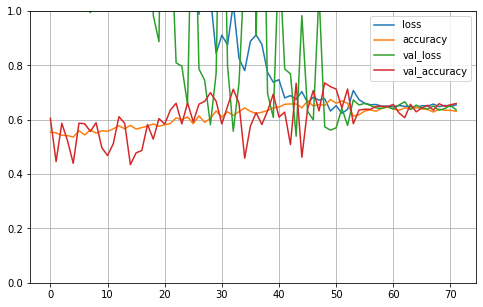

313/313 [==============================] - 0s 928us/step - loss: 0.6360 - accuracy: 0.6595


[0.6360121369361877, 0.659500002861023]

In [82]:
deep_model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_3 = deep_model_3.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_3.evaluate(X_train_validation, y_train_validation)

In [83]:
clear_session()
deep_model_4 = Sequential()
deep_model_4.add(Dense(50,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_4.add(Dense(25,activation="relu"))
deep_model_4.add(Dense(15,activation="relu"))
deep_model_4.add(Dense(10,activation="relu"))
deep_model_4.add(Dense(1,activation="sigmoid"))
deep_model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1350      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 3,186
Trainable params: 3,186
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 3s 4ms/step - loss: 326.9235 - accuracy: 0.5749 - val_loss: 10.1150 - val_accuracy: 0.5837
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 4.5024 - accuracy: 0.5486 - val_loss: 1.4529 - val_accuracy: 0.5877
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 2.3814 - accuracy: 0.5473 - val_loss: 2.8595 - val_accuracy: 0.5807
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 2.0641 - accuracy: 0.5411 - val_loss: 1.4008 - val_accuracy: 0.6094
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 1.8481 - accuracy: 0.5518 - val_loss: 0.7888 - val_accuracy: 0.6147
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 1.0785 - accuracy: 0.5565 - val_loss: 0.9164 - val_accuracy: 0.5833
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9719 - accuracy: 0.5728 - val_loss: 1.1498 - val_accuracy: 0.4

Epoch 58/100
313/313 [==============================] - 1s 3ms/step - loss: 0.6564 - accuracy: 0.6265 - val_loss: 0.6955 - val_accuracy: 0.6060
Epoch 59/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7309 - accuracy: 0.6161 - val_loss: 0.7706 - val_accuracy: 0.4890
Epoch 60/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6861 - accuracy: 0.6064 - val_loss: 0.6320 - val_accuracy: 0.6596
Epoch 61/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6863 - accuracy: 0.6208 - val_loss: 1.2644 - val_accuracy: 0.4494
Epoch 62/100
313/313 [==============================] - 1s 3ms/step - loss: 0.8274 - accuracy: 0.5746 - val_loss: 0.6462 - val_accuracy: 0.6402
Epoch 63/100
313/313 [==============================] - 1s 3ms/step - loss: 0.6830 - accuracy: 0.6149 - val_loss: 0.6553 - val_accuracy: 0.6324
Epoch 64/100
313/313 [==============================] - 1s 3ms/step - loss: 0.6652 - accuracy: 0.6226 - val_loss: 0.6363 - val_accuracy:

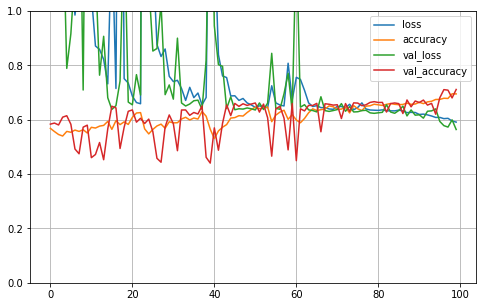

313/313 [==============================] - 0s 751us/step - loss: 0.5640 - accuracy: 0.7113


[0.5639641284942627, 0.7113000154495239]

In [84]:
deep_model_4.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_4 = deep_model_4.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_4.evaluate(X_train_validation, y_train_validation)

In [85]:
from tensorflow.python.keras.layers import Dropout

clear_session()
deep_model_5 = Sequential()
deep_model_5.add(Dense(50,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_5.add(Dropout(0.4))
deep_model_5.add(Dense(25,activation="sigmoid"))
deep_model_5.add(Dropout(0.4))
deep_model_5.add(Dense(15,activation="sigmoid"))
deep_model_5.add(Dropout(0.4))
deep_model_5.add(Dense(10,activation="sigmoid"))
deep_model_5.add(Dropout(0.4))
deep_model_5.add(Dense(1,activation="sigmoid"))
deep_model_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1350      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

Epoch 1/100
313/313 [==============================] - 3s 4ms/step - loss: 0.7531 - accuracy: 0.5552 - val_loss: 0.6839 - val_accuracy: 0.5688
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5539 - val_loss: 0.6838 - val_accuracy: 0.5688
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5459 - val_loss: 0.6838 - val_accuracy: 0.5688
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5618 - val_loss: 0.6837 - val_accuracy: 0.5688
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6849 - accuracy: 0.5682 - val_loss: 0.6841 - val_accuracy: 0.5688
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.5634 - val_loss: 0.6837 - val_accuracy: 0.5688
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.5672 - val_loss: 0.6838 - val_accuracy: 0.5688

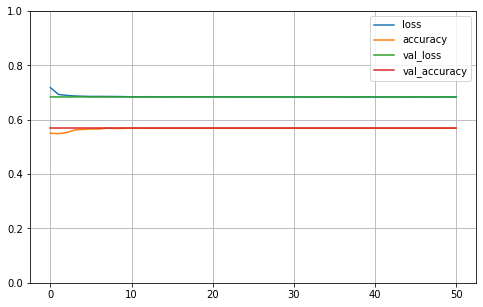

313/313 [==============================] - 0s 823us/step - loss: 0.6836 - accuracy: 0.5688


[0.683646559715271, 0.5687999725341797]

In [86]:
deep_model_5.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_5 = deep_model_5.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_5.evaluate(X_train_validation, y_train_validation)

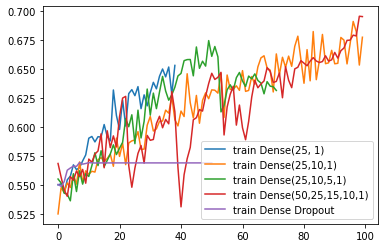

In [87]:
plt.plot(history_1.history['accuracy'], label = "train Dense(25, 1)")

plt.plot(history_2.history['accuracy'], label = "train Dense(25,10,1)")

plt.plot(history_3.history['accuracy'], label = "train Dense(25,10,5,1)")

plt.plot(history_4.history['accuracy'], label = "train Dense(50,25,15,10,1)")

plt.plot(history_5.history['accuracy'], label = "train Dense Dropout")

plt.legend()
plt.show()

In [88]:
from sklearn import  metrics


models = []
models.append(('Dense(25, 1)', deep_model_1))
models.append(('Dense(25,10,1)', deep_model_2))
models.append(('Dense(25,10,5,1)', deep_model_3))
models.append(('Dense(50,25,15,10,1)', deep_model_4))
models.append(('Dense Dropout', deep_model_5))


accuracies = []
for name, model in models:
    print(name)
    y_pred = model.predict_classes(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {}'.format(accuracy))
    accuracies.append(accuracy)

Dense(25, 1)
Accuracy: 0.5858935858935859
Dense(25,10,1)
Accuracy: 0.7681142681142681
Dense(25,10,5,1)
Accuracy: 0.6633556633556633
Dense(50,25,15,10,1)
Accuracy: 0.7184492184492185
Dense Dropout
Accuracy: 0.561022561022561


In [89]:
import pandas as pd
d = {'accuracy' : accuracies}
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Dense(25, 1)', 'Dense(25,10,1)', 'Dense(25,10,5,1)', 'Dense(50,25,15,10,1)', 'Dense Dropout'])
df

,Method,accuracy
0,"Dense(25, 1)",0.585894
1,"Dense(25,10,1)",0.768114
2,"Dense(25,10,5,1)",0.663356
3,"Dense(50,25,15,10,1)",0.718449
4,Dense Dropout,0.561023


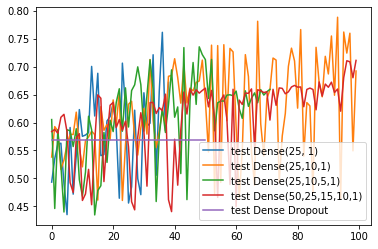

In [90]:
plt.plot(history_1.history['val_accuracy'], label = "test Dense(25, 1)")

plt.plot(history_2.history['val_accuracy'], label = "test Dense(25,10,1)")

plt.plot(history_3.history['val_accuracy'], label = "test Dense(25,10,5,1)")

plt.plot(history_4.history['val_accuracy'], label = "test Dense(50,25,15,10,1)")

plt.plot(history_5.history['val_accuracy'], label = "test Dense Dropout")

plt.legend()
plt.show()